In [1]:
# AutoEncoder를 이용한 MNIST Reconstruction
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST 데이터 다운로드
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.02
training_epochs = 50   # 반복횟수
batch_size = 256       # 배치개수
display_step = 1       # 손실함수 출력 주기
examples_to_show = 10  # MNIST Reconstruction
input_size = 784       # 28*28
hidden1_size = 256
hidden2_size = 128

In [4]:
# Autoencoder는 Unsupervised Learning이므로 타겟 레이블(label) y가 필요하지 않다.
x = tf.placeholder(tf.float32, shape=[None, input_size])

In [5]:
# Autoencoder 구조 정의
def build_autoencoder(x):
    # encoding = 784 -> 256 ->128
    W1 = tf.Variable(tf.random_normal(shape=[input_size, hidden1_size]))
    b1 = tf.Variable(tf.random_normal(shape=[hidden1_size]))
    H1_output = tf.nn.sigmoid(tf.matmul(x, W1) + b1) 
    W2 = tf.Variable(tf.random_normal(shape=[hidden1_size, hidden2_size]))
    b2 = tf.Variable(tf.random_normal(shape=[hidden2_size]))
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output, W2) + b2)
    # decoding = 128 -> 256 -> 784
    W3 = tf.Variable(tf.random_normal(shape=[hidden2_size, hidden1_size]))
    b3 = tf.Variable(tf.random_normal(shape=[hidden1_size]))
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output, W3) + b3)
    W4 = tf.Variable(tf.random_normal(shape=[hidden1_size, input_size])) 
    b4 = tf.Variable(tf.random_normal(shape=[input_size]))
    reconstructed_x = tf.nn.sigmoid(tf.matmul(H3_output, W4) + b4)
    
    return reconstructed_x

In [6]:
# Autoencoder 선언
y_pred = build_autoencoder(x)
y_true = x   # 타겟데이터 = inputdata

# 손실함수와 옵티마이저 정의
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))  # MSE(Mean of Squared Error)
train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


반복(Epoch): 1, 손실 함수(Loss): 0.197353
반복(Epoch): 2, 손실 함수(Loss): 0.150320
반복(Epoch): 3, 손실 함수(Loss): 0.136000
반복(Epoch): 4, 손실 함수(Loss): 0.127852
반복(Epoch): 5, 손실 함수(Loss): 0.115574
반복(Epoch): 6, 손실 함수(Loss): 0.116748
반복(Epoch): 7, 손실 함수(Loss): 0.109143
반복(Epoch): 8, 손실 함수(Loss): 0.107545
반복(Epoch): 9, 손실 함수(Loss): 0.101513
반복(Epoch): 10, 손실 함수(Loss): 0.101412
반복(Epoch): 11, 손실 함수(Loss): 0.097058
반복(Epoch): 12, 손실 함수(Loss): 0.095741
반복(Epoch): 13, 손실 함수(Loss): 0.094371
반복(Epoch): 14, 손실 함수(Loss): 0.093560
반복(Epoch): 15, 손실 함수(Loss): 0.090732
반복(Epoch): 16, 손실 함수(Loss): 0.091689
반복(Epoch): 17, 손실 함수(Loss): 0.088162
반복(Epoch): 18, 손실 함수(Loss): 0.087085
반복(Epoch): 19, 손실 함수(Loss): 0.085716
반복(Epoch): 20, 손실 함수(Loss): 0.081493
반복(Epoch): 21, 손실 함수(Loss): 0.077831
반복(Epoch): 22, 손실 함수(Loss): 0.078147
반복(Epoch): 23, 손실 함수(Loss): 0.077017
반복(Epoch): 24, 손실 함수(Loss): 0.078176
반복(Epoch): 25, 손실 함수(Loss): 0.074194
반복(Epoch): 26, 손실 함수(Loss): 0.073516
반복(Epoch): 27, 손실 함수(Loss): 0.071791
반복(Epoch):

C:\Users\Jinsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


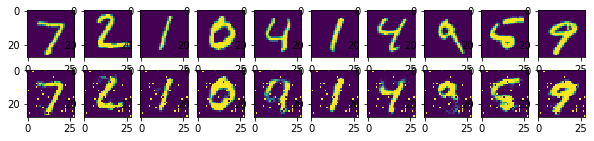

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, current_loss = sess.run([train_step, loss], feed_dict={x: batch_xs})
        if epoch % display_step == 0:
            print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), current_loss))
            
    # Reconstruction 수행
    reconstructed_result = sess.run(y_pred, feed_dict={x: mnist.test.images[:examples_to_show]})
    # 원본 MNIST 데이터와 Reconstruction 결과 비교
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstructed_result[i], (28, 28)))
    f.savefig('reconstructed_mnist_image.png')
    f.show()